## Сценарный анализ
В рамках сценарного анализа предполагается расмотреть 2 варианта лечения лейкоза:
1. Таргетированная терапия (введение лекарственного препарата)
2. Трансплантация костного мозга (Химиотерапия + введение стволовых клеток)

### Сценарий 1
Для первого случая необходимо добавить уравнение, описывающее динамику концентрации лекарственного препарата. Пусть um обозначает концентрацию лекарственного препарата. Тогда можно добавить новое уравнение, описывающее изменение этой концентрации со временем.

Ниже приведена модифицированная система уравнений с добавлением концентрации лекарственного препарата:
$$
\frac{du_h}{dt} = (\mu_1 - \xi_h u_m) (1 - u_h - u_d - u_s)u_h + \alpha \gamma u_a u_s - \nu_1 u_h - \delta_h u_m u_h,
$$
$$
\frac{du_d}{dt} = (\mu_2 - \xi_в u_m) (1 - u_h - u_d - u_s)u_d + (1 - \alpha) \gamma u_a u_s - \nu_2 u_d - \delta_d u_m u_d,
$$
$$
\frac{du_s}{dt} = (\mu_3 - \xi_s u_m) (1 - u_h - u_d - u_s)u_s^2 - \gamma u_a u_s - \delta_s u_m u_s,
$$
$$
\frac{du_a}{dt} = -\mu_4 u_a (\beta - u_s).
$$
$$
\frac{du_m}{dt} = \kappa - \lambda u_m.
$$
где
- $u_m$ - доли медикаментов в крови,
- $\kappa$ - скорость введения медикаментов,
- $\lambda$ - скорость выведения медикаментов.
- $\delta_h, \delta_d, \delta_s$ - скорость воздействия медикаментов на клетки.
- $\xi_h, \xi_d, \xi_s$ - коэффициенты влияния медикаментов на скорость размножения клеток.

План сценария:
1. Задать начальные условия и параметры приводящие к лейкозу.
2. В момент времени $t_1$ начать вводить медикаменты в кровь.
3. В момент времени $t_2$ закончить вводить медикаменты в кровь.
4. Проанализировать изменения в системе уравнений.

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

In [2]:
# Определение функции системы уравнений
def system(t, y, mu1, mu2, mu3, mu4, alpha, beta, gamma, nu1, nu2, kappa, lambd, delta_h, delta_d, delta_s, xi_h, xi_d, xi_s, t1, t2):
    _uh, _ud, _us, _ua, _um = y

    dudt = [
        (mu1 - xi_h * _um) * (1 - _uh - _ud - _us) * _uh + alpha * gamma * _ua * _us - nu1 * _uh - delta_h * _um * _uh,
        (mu2 - xi_d * _um) * (1 - _uh - _ud - _us) * _ud + (1 - alpha) * gamma * _ua * _us - nu2 * _ud - delta_d * _um * _ud,
        (mu3 - xi_s * _um) * (1 - _uh - _ud - _us) * _us ** 2 - gamma * _ua * _us - delta_s * _um * _us,
        -mu4 * _ua * (beta - _us),
        kappa - lambd * _um if t1 < t < t2 else -lambd * _um
    ]
    # Ограничение значений чтобы не было отрицательных значений
    if _uh + dudt[0] < 0:
        dudt[0] = -_uh
    if _ud + dudt[1] < 0:
        dudt[1] = -_ud
    if _us + dudt[2] < 0:
        dudt[2] = -_us
    if _ua + dudt[3] < 0:
        dudt[3] = -_ua
    if _um + dudt[4] < 0:
        dudt[4] = -_um
    # Ограничение значений чтобы не было значений больше 1        
    if _uh + dudt[0] > 1:
        dudt[0] = 1 - _uh
    if _ud + dudt[1] > 1:
        dudt[1] = 1 - _ud
    if _us + dudt[2] > 1:
        dudt[2] = 1 - _us
    if _ua + dudt[3] > 1:
        dudt[3] = 1 - _ua
    if _um + dudt[4] > 1:
        dudt[4] = 1 - _um
    return dudt

In [3]:
# Параметры
params = {
    'mu1': 1, 'mu2': 1.5, 'mu3': 0.1, 'mu4': 0.1,
    'alpha': 0.2, 'beta': 0.35, 'gamma': 0.2,
    'nu1': 0.1, 'nu2': 0.1,
    'kappa': 0.1, 'lambd': 0.1,
    'delta_h': 0.2, 'delta_d': 0.5, 'delta_s': 0.05,     # Скорость воздействия медикаментов на клетки
    'xi_h': 0.2, 'xi_d': 0.5, 'xi_s': 0.05,              # Коэффициенты влияния медикаментов на скорость размножения клеток
    't1': 50, 't2': 150
}

# Начальные условия
uh, ud, us, ua, um = 0.55, 0.03, 0.1, 0.2, 0
t_span = [0, 250]  # Временной интервал
intervals = np.linspace(t_span[0], t_span[1], 500)  # Интервалы для времени

In [4]:
# Решение системы уравнений
sol = solve_ivp(system, t_span, [uh, ud, us, ua, um], args=tuple(params.values()), t_eval=intervals)

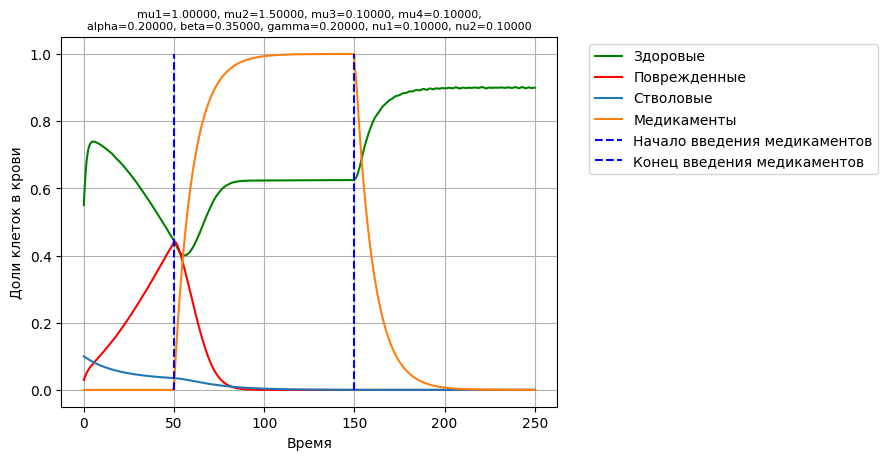

In [6]:
%matplotlib inline
# Визуализация результатов
plt.figure()
#plt.suptitle('Доли клеток в крови', fontsize=14, fontweight='bold')
plt.plot(sol.t, sol.y[0], label='Здоровые', color='green')
plt.plot(sol.t, sol.y[1], label='Поврежденные', color='red')
plt.plot(sol.t, sol.y[2], label='Стволовые')
#plt.plot(sol.t, sol.y[3], label='Клетки микроокружения')
plt.plot(sol.t, sol.y[4], label='Медикаменты')
plt.vlines(params['t1'], 0, 1, color='blue', linestyle='--', label='Начало введения медикаментов')
plt.vlines(params['t2'], 0, 1, color='blue', linestyle='--', label='Конец введения медикаментов')
plt.grid()
plt.title("mu1={:.5f}, mu2={:.5f}, mu3={:.5f}, mu4={:.5f},\nalpha={:.5f}, beta={:.5f}, gamma={:.5f}, nu1={:.5f}, nu2={:.5f}".format(
    params['mu1'], params['mu2'], params['mu3'], params['mu4'], params['alpha'], params['beta'], params['gamma'], params['nu1'], params['nu2']), fontsize=8)
plt.xlabel('Время')
plt.ylabel('Доли клеток в крови')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('case1.png', bbox_inches='tight')
plt.show()

In [69]:
%matplotlib notebook
# Инициализация фигуры и осей
fig, ax = plt.subplots(figsize=(10, 5))
lines = {
    'uh': ax.plot([], [], label='uh', color='green')[0],
    'ud': ax.plot([], [], label='ud', color='red')[0],
    'us': ax.plot([], [], label='us')[0],
    'um': ax.plot([], [], label='um')[0]
}
ax.set_xlabel('Time')
ax.set_ylabel('Variables')
ax.legend()
ax.grid(True)

# Функция для решения и отображения
def solve_and_plot(uh0 = uh, ud0 = ud, us0 = us, ua0 = ua, mu1 = params['mu1'], mu2 = params['mu2'], mu3 = params['mu3'], mu4 = params['mu5'], alpha = params['alpha'], beta = params['beta'], gamma = params['gamma'], nu1 = params['nu1'], nu2 = params['nu2'], kappa = params['kappa'], lambd = params['lambd'], delta_h = params['delta_h'], delta_d = params['delta_d'], delta_s = params['delta_s'], xi_h = params['xi_h'], xi_d = params['xi_d'], xi_s = params['xi_s'], t1 = params['t1'], t2 = params['mt2']):
    _sol = solve_ivp(system, t_span, [uh0, ud0, us0, ua0, 0], args=(mu1, mu2, mu3, mu4, alpha, beta, gamma, nu1, nu2, kappa, lambd, delta_h, delta_d, delta_s, xi_h, xi_d, xi_s, t1, t2), t_eval=intervals)
    for var, line in lines.items():
        line.set_data(_sol.t, _sol.y[list(lines.keys()).index(var)])
    ax.relim()
    ax.autoscale_view()
    ax.set_ylim([np.min(_sol.y), np.max(_sol.y)*1.1])
    #ax.set_xlim(t_span)
    #ax.set_ylim(0, 1)
    fig.canvas.draw_idle()

# Интерактивные элементы
interact(solve_and_plot,
        uh0=FloatSlider(min=0, max=1, step=0.01, value=uh),
        ud0=FloatSlider(min=0, max=1, step=0.01, value=ud),
        us0=FloatSlider(min=0, max=1, step=0.01, value=us),
        mu1=FloatSlider(min=0, max=3, step=0.01, value=params['mu1']),
        mu2=FloatSlider(min=0, max=3, step=0.01, value=params['mu2']),
        mu3=FloatSlider(min=0, max=3, step=0.01, value=params['mu3']),
        mu4=FloatSlider(min=0, max=3, step=0.01, value=params['mu4']),
        alpha=FloatSlider(min=0, max=1, step=0.01, value=params['alpha']),
        beta=FloatSlider(min=0, max=1, step=0.01, value=params['beta']),
        gamma=FloatSlider(min=0, max=1, step=0.01, value=params['gamma']),
        nu1=FloatSlider(min=0, max=0.1, step=0.001, value=params['nu1']),
        nu2=FloatSlider(min=0, max=0.1, step=0.001, value=params['nu2']),
        kappa=FloatSlider(min=0, max=1, step=0.01, value=params['kappa']),
        lambd=FloatSlider(min=0, max=1, step=0.01, value=params['lambd']),
        delta_h=FloatSlider(min=0, max=1, step=0.01, value=params['delta_h']),
        delta_d=FloatSlider(min=0, max=1, step=0.01, value=params['delta_d']),
        delta_s=FloatSlider(min=0, max=1, step=0.01, value=params['delta_s']),
        xi_h=FloatSlider(min=0, max=1, step=0.01, value=params['xi_h']),
        xi_d=FloatSlider(min=0, max=1, step=0.01, value=params['xi_d']),
        xi_s=FloatSlider(min=0, max=1, step=0.01, value=params['xi_s']),
        t1=FloatSlider(min=0, max=250, step=1, value=params['t1']),
        t2=FloatSlider(min=0, max=250, step=1, value=params['t2']))

<IPython.core.display.Javascript object>

KeyError: 'mu5'

## Сценарий 2
Во втором случае вначале будет производиться химиотерапия, а затем трансплантация костного мозга. Для этого необходимо добавить новые уравнения, описывающие динамику стволовых клеток и их влияние на остальные клетки. Пусть $u_s$ обозначает долю стволовых клеток. Тогда можно добавить новые уравнения, описывающие изменение этой доли со временем.

Ниже приведена модифицированная система уравнений с добавлением доли стволовых клеток:
$$
\frac{du_h}{dt} = (\mu_1 - \xi_h u_m) (1 - u_h - u_d - u_s)u_h + \alpha \gamma u_a u_s - \nu_1 u_h - \delta_h u_m u_h,
$$
$$
\frac{du_d}{dt} = (\mu_2 - \xi_d u_m) (1 - u_h - u_d - u_s)u_d + (1 - \alpha) \gamma u_a u_s - \nu_2 u_d - \delta_d u_m u_d,
$$
$$
\frac{du_s}{dt} = (\mu_3 - \xi_s u_m) (1 - u_h - u_d - u_s)u_s^2 - \gamma u_a u_s - \delta_s u_m u_s,
$$
$$
\frac{du_a}{dt} = -\mu_4 u_a (\beta - u_s),
$$
$$
\frac{du_m}{dt} = \kappa - \lambda u_m,
$$
$$
\frac{du_t}{dt} = \gamma u_a u_s - \delta_t u_m u_t.
$$
где
- $u_t$ - доля трансплантированных клеток.
- $\delta_t$ - скорость воздействия трансплантированных клеток на клетки.
- Остальные параметры остаются прежними.

План сценария:
1. Задать начальные условия и параметры приводящие к лейкозу.
2. В момент времени $t_1$ начать химиотерапию.
3. В момент времени $t_2$ закончить химиотерапию.
4. В момент времени $t_3$ начать трансплантацию костного мозга.
5. В момент времени $t_4$ закончить трансплантацию костного мозга.